In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
cat = ['T-shirt/top', 'Trouser', 'Pullover', 'Coat', 'Dress', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [7]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

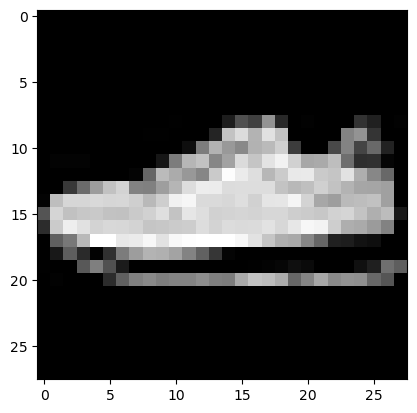

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[425], cmap = 'gray')

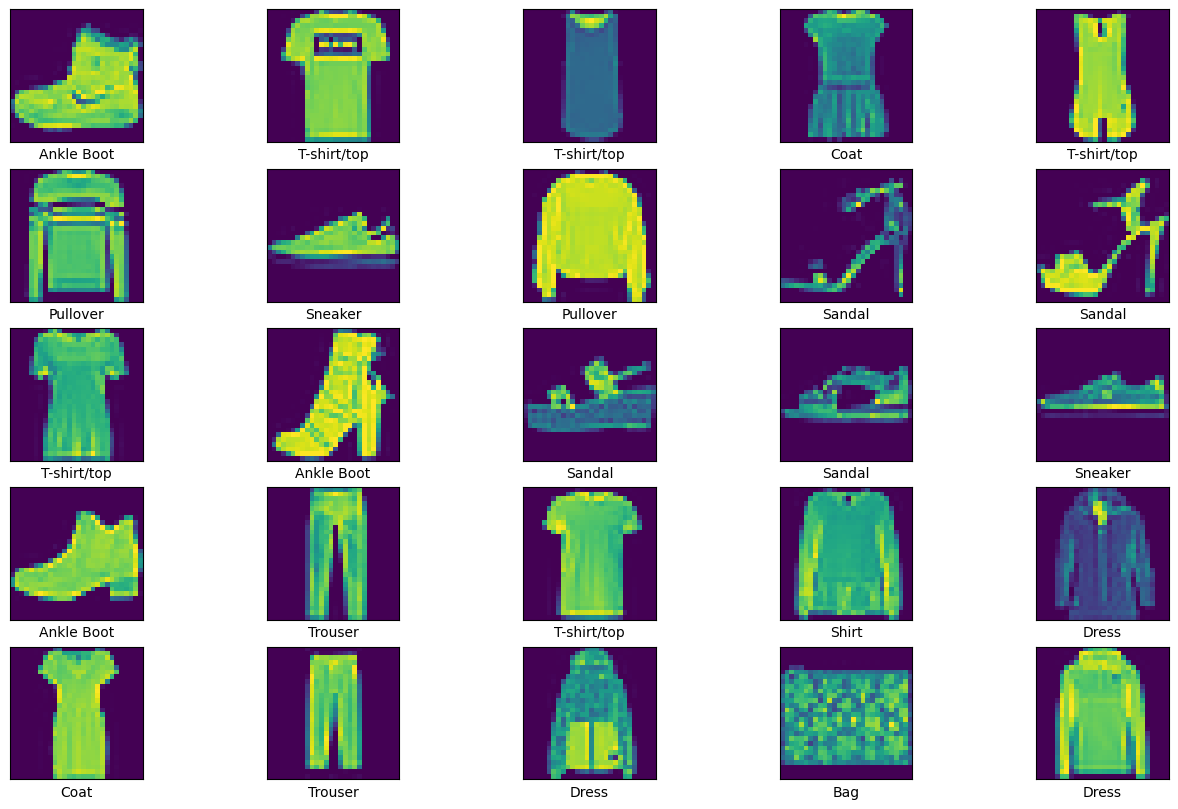

In [8]:
plt.figure(figsize=(16, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(cat[y_train[i]])

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
#one hot encoding
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [12]:
#define the architecture 
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64,(3, 3), activation = 'relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation = 'relu'),
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

C:\Users\ARPITA\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = 'SGD')

In [16]:
history = model.fit(x_train, y_train, epochs = 5, batch_size = 10)

Epoch 1/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 74s 12ms/step - accuracy: 0.0995 - loss: nan
Epoch 2/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 76s 13ms/step - accuracy: 0.1034 - loss: nan
Epoch 3/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 77s 12ms/step - accuracy: 0.1006 - loss: nan
Epoch 4/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 68s 11ms/step - accuracy: 0.1002 - loss: nan
Epoch 5/5
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 90s 13ms/step - accuracy: 0.0989 - loss: nan


In [18]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.1001 - loss: nan
